# Exercise 1 Solutions

*Portions of these solutions are based on student-submitted code.*

## Question Two

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot, qqline
import warnings
warnings.filterwarnings('ignore')

Read in the data, and divide the `trade_size` variables by 1000. (Without this transformation, we find that the Yeo-Johnson transformation does not function appropriately.

In [2]:
data = pd.read_csv("bonddata.txt")
data = data.drop(['id', 'bond_id'], axis=1)
data.iloc[:,range(6,57,5)] = data.iloc[:,range(6,57,5)]/1000.0

Transform all of the categorical variables to the appropriate type.

In [3]:
data['is_callable'] = data['is_callable'].astype('category').cat.as_unordered()
data['trade_type'] = data['trade_type'].astype('category').cat.as_unordered()
data['trade_type_last1'] = data['trade_type_last1'].astype('category').cat.as_unordered()
data['trade_type_last2'] = data['trade_type_last2'].astype('category').cat.as_unordered()
data['trade_type_last3'] = data['trade_type_last3'].astype('category').cat.as_unordered()
data['trade_type_last4'] = data['trade_type_last4'].astype('category').cat.as_unordered()
data['trade_type_last5'] = data['trade_type_last5'].astype('category').cat.as_unordered()
data['trade_type_last6'] = data['trade_type_last6'].astype('category').cat.as_unordered()
data['trade_type_last7'] = data['trade_type_last7'].astype('category').cat.as_unordered()
data['trade_type_last8'] = data['trade_type_last8'].astype('category').cat.as_unordered()
data['trade_type_last9'] = data['trade_type_last9'].astype('category').cat.as_unordered()
data['trade_type_last10'] = data['trade_type_last10'].astype('category').cat.as_unordered()

Apply the Yeo-Johnson transformation to all appropriate columns.

In [4]:
from scipy.stats import yeojohnson

for column in data.columns[1:]:
    if data[column].dtypes =='float64' or data[column].dtypes =='int64':
        data[column] = yeojohnson(data[column].astype('float64'))[0]

Create the columns of dummy variables for the categorical variables.

In [5]:
datawd = pd.get_dummies(data,drop_first=True)

Convert everything to float. R does not appropriately recognize the categorical variables coming from Python.

In [6]:
datawd = datawd.astype('float64')

Call the Box-Cox procedure in R.

In [7]:
import rpy2
%load_ext rpy2.ipython

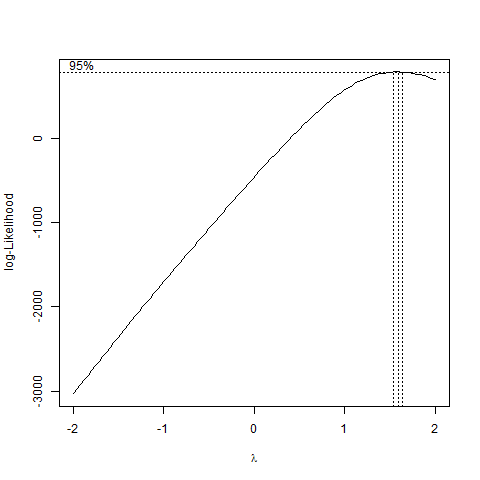

In [8]:
%%R -i datawd

library(MASS)
boxcox(trade_price~., data=datawd)

Transform the response using the appropriate value.

In [9]:
datawd['trade_price'] = datawd['trade_price']**1.6

Fit the model and report the results.

In [10]:
datawd = sm.add_constant(datawd)
holdout = sm.OLS(datawd['trade_price'], datawd.drop(['trade_price'], axis=1)).fit()
holdout.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trade_price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1120.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:27:16   Log-Likelihood:                -8338.0
No. Observations:                1620   AIC:                         1.682e+04
Df Residuals:                    1550   BIC:                         1.719e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        25.4149     13.860      1.834      0.067      -1.771      52.601
weight                        9.8509      9.336      1.055      0.292      -8.462      28.164
current_coupon                0.4504      0.503      0.896      0.370      -0.536       1.437
time_to_maturity             -0.2940      1.870     -0.157      0.875      -3.961       3.373
reporting_delay              -0.6286      0.189     -3.332      0.001      -0.999      -0.259
trade_size                   10.3996      1.705      6.100      0.000       7.056      13.743
curve_based_price             0.5753      0.063      9.137      0.000       0.452       0.699
received_time_diff_last1     -0.6358      0.671     -0.947      0.344      -1.953       0.681
trade_price_last1             0.6061      0.053     11.515      0.000       0.503       0.709
trade_size_last1             -5.6025      2.194     -2.553      0.011      -9.907      -1.298
curve_based_price_last1       0.0103      0.094      0.109      0.913      -0.175       0.195
received_time_diff_last2     -0.0540      0.121     -0.445      0.657      -0.292       0.184
trade_price_last2             0.0468      0.052      0.897      0.370      -0.055       0.149
trade_size_last2              1.4614      2.485      0.588      0.557      -3.414       6.336
curve_based_price_last2      -0.0885      0.086     -1.028      0.304      -0.257       0.080
received_time_diff_last3      0.0929      0.147      0.632      0.527      -0.195       0.381
trade_price_last3             0.0714      0.056      1.283      0.200      -0.038       0.180
trade_size_last3             -1.5602      2.298     -0.679      0.497      -6.069       2.948
curve_based_price_last3      -0.1623      0.092     -1.761      0.078      -0.343       0.018
received_time_diff_last4     -0.0897      0.165     -0.543      0.588      -0.414       0.235
trade_price_last4             0.0979      0.042      2.318      0.021       0.015       0.181
trade_size_last4             -2.1126      2.283     -0.926      0.355      -6.590       2.365
curve_based_price_last4       0.2943      0.104      2.821      0.005       0.090       0.499
received_time_diff_last5     -0.0889      0.202     -0.440      0.660      -0.485       0.307
trade_price_last5             0.0890      0.063      1.420      0.156      -0.034       0.212
trade_size_last5             -1.1027      2.277     -0.484      0.628      -5.570       3.364
curve_based_price_last5      -0.4625      0.123     -3.754      0.000      -0.704      -0.221
received_time_diff_last6     -0.0322      0.235     -0.137      0.891      -0.493       0.428
trade_price_last6            -0.0478      0.041     -1.153      0.249      -0.129       0.033
trade_size_last6              1.9043      2.290      0.832      0.406      

Below is the plot of residuals versus fitted values. The limits of the Y axis are adjusted to remove the influence of the outlier on the interpretation of the plot. There is nothing in this plot to suggest concerns with the fit.

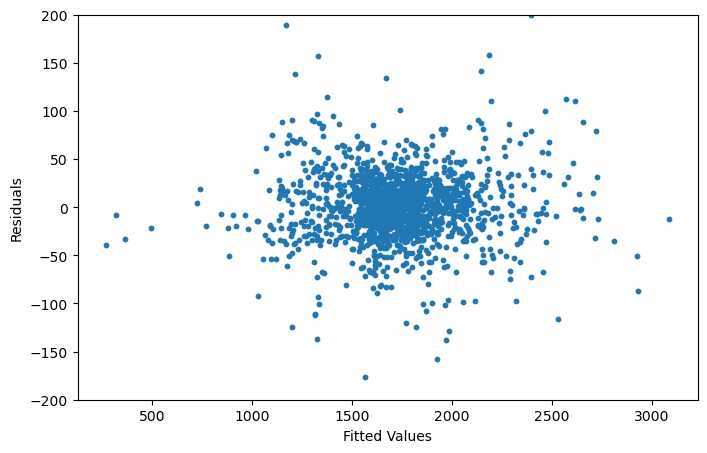

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(holdout.fittedvalues, holdout.resid, s=10)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.ylim(-200,200)
plt.show()